# Problem Set #2

## Problem 1 

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


floating point types에 따라서 machine epsilon 이 달라질 수 있는데 이는 numpy.finfo()함수로 구할 수 있다. 

In [7]:
print("datatype = float 일 때 machine epsilon = {} 이다.".format(np.finfo(np.float).eps))
print("datatype = float16 일 때 machine epsilon = {} 이다.".format(np.finfo(np.float16).eps))
print("datatype = float32 일 때 machine epsilon = {} 이다.".format(np.finfo(np.float32).eps))


datatype = float 일 때 machine epsilon = 2.220446049250313e-16 이다.
datatype = float16 일 때 machine epsilon = 0.0009765625 이다.
datatype = float32 일 때 machine epsilon = 1.1920928955078125e-07 이다.


혹은 아래와 같은 프로그램으로 float type 에 대해서 machine epsilon을 직접 계산해볼 수도 있다.

In [8]:
n = 0

while (1 + 2**n) != 1:
    n = n - 1

epsilon = 2**(n+1)
print("Machine Epsilon is", epsilon)

Machine Epsilon is 2.220446049250313e-16


## Problem 2

### 2-(a)

<function matplotlib.pyplot.show(*args, **kw)>

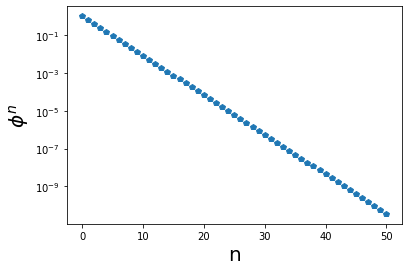

In [136]:
def golden(n):
    if n == 0:
        return 1
    elif n == 1:
        return 0.5*(5**0.5-1)
    
    else:
        a = golden(1)*golden(n-1)
    return a    

a = np.zeros(51)
b = np.linspace(0, 50, 51)
for i in range(0, 51):
    a[i] = golden(i)
plt.xlabel('n', fontsize = 20)
plt.ylabel('$ \phi^{n} $', fontsize = 20)
plt.plot(b,a, 'p')
plt.yscale('log')
plt.show

### 2-(b)


$\phi = \frac{\sqrt{5}-1}{2}$ 은 방정식 $\phi^{2} + \phi - 1= 0$ 의 근이다. 

$\phi^{2}=1-\phi^{1}$ 의 의 양변에 $\phi^{n-1}$을 곱하면

Equation (2)인 $\phi^{n+1}=\phi^{n-1}-\phi^{n}$ 이 얻어진다.

### 2-(c)

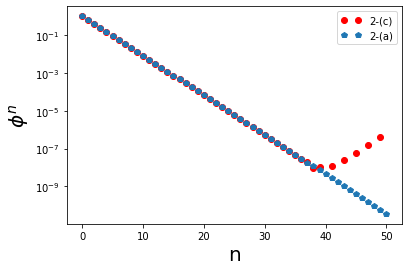

In [137]:
phi_involution = np.zeros(51)
phi_involution[0] = 1
phi_involution[1] = 0.5*(5**0.5-1)

for i in range(2, 51):
    phi_involution[i] = phi_involution[i-2] - phi_involution[i-1]

    
def golden(n):
    if n == 0:
        return 1
    elif n == 1:
        return 0.5*(5**0.5-1)
    
    else:
        a = golden(1)*golden(n-1)
    return a    

a = np.zeros(51)
b = np.linspace(0, 50, 51)
for i in range(0, 51):
    a[i] = golden(i)
    
    
plt.xlabel('n', fontsize = 20)
plt.ylabel('$ \phi^{n} $', fontsize = 20)
plt.plot(b, phi_involution, 'ro', label = '2-(c)')
plt.plot(b, a, 'p', label = '2-(a)')
plt.legend(loc=1, numpoints=2)
plt.yscale('log')
plt.show()

### 2-(d)

$\phi^{n}$ 의 오차를 $\epsilon_{n}$ 이라고 하자. 그리고 $\widehat{\phi^{n}} = \phi^{n} + \epsilon_{n}$으로 두자. 이를 Equation (2)인 $\phi^{n+1}=\phi^{n-1}-\phi^{n}$ 에 대입하면 아래와 같은 식을 얻을 수 있다. <br>
 $\phi^{n+1} + \epsilon_{n+1} = \phi^{n-1}+\epsilon_{n-1} -(\phi^{n}+\epsilon_{n})  $

즉, $\epsilon_{n+1} = \epsilon_{n-1} - \epsilon_{n}$ 즉, 오차는 왼쪽에서 구한 식을 만족한다. 계산의 편의성을 위해서 $\epsilon_{n} = Cr^{n}$이라고 오차의 크기는 공비 r에 따라 n제곱에 비례해서 커진다고 가정해보자.

이 때 $\epsilon_{n} = Cr^{n}$을 $\epsilon_{n+1} = \epsilon_{n-1} - \epsilon_{n}$에 대입하면 $r^{n+1} + r^{n} - r^{n-1}=0$을 얻는다. 
즉, $r^2+r-1=0$으로서 $r=\frac{-1\pm\sqrt{5}}{2}$ 이다. 따라서 정확한 $\epsilon_{n}$의 값을 일반화해서 나타내면 임의의 상수 $C_{1}과 C_{2}$에 대해서 
$\epsilon_{n} = C_{1}r_{+}^{n} + C_{2}r_{-}^{n}$이다.
(단, $r_{+} = \frac{\sqrt5-1}{2}  r_{-} =  \frac{-\sqrt5-1}{2}$ 이다.)





$\epsilon_{n} = C_{1}r_{+}^{n} + C_{2}r_{-}^{n}$ 에서 이 때 $\mid r_{+} \mid < 1$ 이지만, $\mid r_{-} \mid > 1$ 이기 때문에 n이 커질수록 그 오차의 크기가 지수함수적으로 증가한다. 그리고 $r_{-}$의 값이 음수이기 때문에 오차의 값이 양음의 부호가 번갈아가면서 커지게 된다. 이는 2-(c)에서 구한 값들에 대해서 정확하게 값이 구해진 2-(a)의 값들을 뺀 값들을 plot한 아래 그래프를 보면서 확인할 수 있다. 


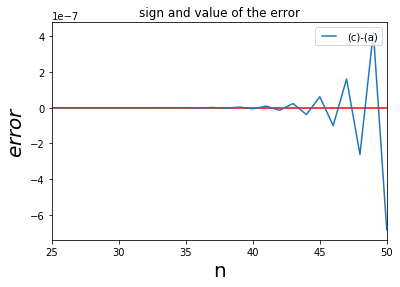

In [138]:
plt.xlabel('n', fontsize = 20)
plt.ylabel('$error$', fontsize = 20)
c = phi_involution-a
plt.xlim(25,50)
plt.axhline(0, color='red')
plt.title("sign and value of the error")
plt.plot(b, c, label = '(c)-(a)')
plt.legend(loc=1, numpoints=2)
plt.show()


n = 0일 때 $\epsilon_{0} = C_{1} + C_{2} = $ machine epsilon $\epsilon $만큼의 값을 가지므로 
$ C_{1} \sim C_{2} \sim \frac{\epsilon}{2}  $으로 둘 수 있다. 이 때 $r_{+} = \phi$ 이므로 $\phi^{n}$의 상대 오차는 아래와 같은 식으로 나타낼 수 있다. 

$\frac{\mid\epsilon_{n}\mid}{\phi^{n}} = C_{1} + C_{2}\mid\frac{r_{-}}{r_{+}}\mid^{n} \sim \frac{\epsilon}{2}(\frac{\sqrt{5}+1}{\sqrt{5}-1})^{n}$   

위 식에서 상대 오차의 값이 $(\frac{\sqrt{5}+1}{\sqrt{5}-1})>1$이므로 n이 커지면서 오차가 기하급수적으로 매우 크게 증가하게 된다. 대략 $n = 38$일 경우부터는

In [139]:
import numpy as np
(np.finfo(float).eps/2)*pow((5**0.5+1)/(5**0.5-1), 38)

0.848146528438544

오차의 비율이 무시못할 정도로 커지는 모습을 관찰할 수 있다. 이는 2-(c)의 그래프에서 오차가 크게 발생하기 시작하는 지점과 일치한다. 

따라서 위와 같은 이유로 Equation (2)인 $ \phi^{n+1}=\phi^{n-1}-\phi^{n} $ 에 대한 또 다른 하나의 근의 크기가 1보다 크기 때문에 ( $\mid r_{-} \mid>1$) 오차가 증폭되어  큰 값의 n에 대해서 두 가지 서로 다른 방법으로 구한 값이 다르게 나타난다. 

## Problem 3

### 3 - (a)

In [140]:
h = 6.626e-34
kb = 1.381e-23
c = 2.998e8

$ B_{\lambda}=\frac{\frac{2hc^{2}}{\lambda^{5}}}{e^{\frac{hc}{\lambda kT}}-1} $ 이므로 

$x = \frac{hc}{\lambda kT}$로 정의하면 $\frac{dB_{\lambda}}{d\lambda} = 0$은 다음과 같이 쓸 수 있다.

$ 5(e^{x}-1)-xe^{x}=0$ 

In [141]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt


def f(x):
    f = (x-5)*np.exp(x) + 5
    return f

def df(x):
    df = (x-4)*np.exp(x)
    return df

# Use Newton-Rhapson Method

TOL = 1.e-12
err = TOL + 1
loop = 0 
k = 5


while (err >= TOL):  
    loop += 1
    if (loop > 1000): break
    err=abs(f(k)/df(k))
    k = k - f(k)/df(k)
    print("loop={:2d}  f={:.5e}  df={:.5e}   err={:.5e}".format(loop,f(k),df(k),err))
print(k)

loop= 1  f=1.65643e-01  df=1.38662e+02   err=3.36897e-02
loop= 2  f=2.01202e-04  df=1.38325e+02   err=1.19458e-03
loop= 3  f=2.97890e-10  df=1.38325e+02   err=1.45456e-06
loop= 4  f=-3.99680e-14  df=1.38325e+02   err=2.15355e-12
loop= 5  f=-3.99680e-14  df=1.38325e+02   err=2.88943e-16
4.965114231744276


이 값은 $x = \frac{hc}{\lambda kT}$ = 1.2458038891510255e-16 라는 의미이므로 이는 x에 해당하는 값이 일정하다는 의미를 내포한다. 따라서 x내에 존재하는 변수인 $\lambda와 T$간의 곱이 일정하다는 것을 의미한다. 이 때 일정한 두 변수를 곱한 값을 구하면 


In [142]:
wien_constant  = (h*c)/(k*kb)
print("wien constant is {} m*K".format(wien_constant))

wien constant is 0.0028970776571844666 m*K


즉, 빈의 변위 법칙이 증명되고 번의 변위법칙 상수까지 계산되었다. 

### 3 - (b)

In [143]:
T = 10000
B_lambda = 10**13
h = 6.626e-34
kb = 1.381e-23
c = 2.998e8

$ B_{\lambda}=\frac{\frac{2hc^{2}}{\lambda^{5}}}{e^{\frac{hc}{\lambda kT}}-1} $ 이므로  $x = \frac{hc}{\lambda kT}$ 로 치환하면 위 식을 다음과 같이 정의할 수 있다.

$ \frac{2x^{5}}{e^{x}-1} = \frac{B_{\lambda}h^{4}c^{3}}{(kT)^{5}} = Constant $

따라서 $ f(x) = \frac{2x^{5}}{e^{x}-1} - \frac{B_{\lambda}h^{4}c^{3}}{(kT)^{5}} = 0$ 을 만족하는 x를 찾으면 된다.

In [144]:
const = (B_lambda*h**4*c**3)/(kb*T)**5

def f(x):
    f = (2*pow(x,5))/(np.exp(x)-1)-const
    return f

def df(x):
    a = -2*x**4*(np.exp(x)*x-5*np.exp(x)+5)
    b = (np.exp(x)-1)**2
    df = a/b
    return df

# Use Newton-Rhapson Method

TOL = 1.e-12
err = TOL + 1
loop = 0 
k = 3


while (err >= TOL):  
    loop += 1
    if (loop > 100): break
    err=abs(f(k)/df(k))
    k = k - f(k)/df(k)
    print("loop={:2d}  f={:.7e}  df={:.7e}   err={:.7e}".format(loop,f(k),df(k),err))

# 이 때 k는 x값을 구한 것
# 조건을 만족하는 wavelength는 따로 구해야 한다. 

wavelength = (h*c)/(k*kb*T)
print("wavelength = {:.10e} m 일 때 B_lambda = 10^13 Js-1m-3이다.".format(wavelength))



loop= 1  f=2.7956629e+00  df=8.2929011e+00   err=1.5618401e+00
loop= 2  f=5.7825458e-01  df=4.9061135e+00   err=3.3711519e-01
loop= 3  f=6.4257064e-02  df=3.8305839e+00   err=1.1786409e-01
loop= 4  f=1.2221695e-03  df=3.6852211e+00   err=1.6774744e-02
loop= 5  f=4.7300923e-07  df=3.6823687e+00   err=3.3164075e-04
loop= 6  f=7.1054274e-14  df=3.6823676e+00   err=1.2845244e-07
loop= 7  f=-2.2204460e-16  df=3.6823676e+00   err=1.9295812e-14
wavelength = 1.4889460176e-06 m 일 때 B_lambda = 10^13 Js-1m-3이다.


In [145]:
const = (B_lambda*h**4*c**3)/(kb*T)**5

def f(x):
    f = (2*pow(x,5))/(np.exp(x)-1)-const
    return f

def df(x):
    a = -2*x**4*(np.exp(x)*x-5*np.exp(x)+5)
    b = (np.exp(x)-1)**2
    df = a/b
    return df

# Use Newton-Rhapson Method

TOL = 1.e-12
err = TOL + 1
loop = 0 
k = 10


while (err >= TOL):  
    loop += 1
    if (loop > 100): break
    err=abs(f(k)/df(k))
    k = k - f(k)/df(k)
    print("loop={:2d}  f={:.7e}  df={:.7e}   err={:.7e}".format(loop,f(k),df(k),err))

# 이 때 k는 x값을 구한 것
# 조건을 만족하는 wavelength는 따로 구해야 한다. 

wavelength = (h*c)/(k*kb*T)
print("wavelength = {:.10e} m 일 때 B_lambda = 10^13 Js-1m-3이다.".format(wavelength))



loop= 1  f=2.4553466e+00  df=-2.0073474e+00   err=1.7720896e+00
loop= 2  f=6.4935789e-01  df=-1.0356978e+00   err=1.2231797e+00
loop= 3  f=1.0414435e-01  df=-7.2041123e-01   err=6.2697623e-01
loop= 4  f=4.3322922e-03  df=-6.6123670e-01   err=1.4456237e-01
loop= 5  f=8.4398384e-06  df=-6.5866187e-01   err=6.5518024e-03
loop= 6  f=3.2205349e-11  df=-6.5865684e-01   err=1.2813613e-05
loop= 7  f=-4.4408921e-16  df=-6.5865684e-01   err=4.8895491e-11
loop= 8  f=-4.4408921e-16  df=-6.5865684e-01   err=6.7423457e-16
wavelength = 1.0443572498e-07 m 일 때 B_lambda = 10^13 Js-1m-3이다.


### 따라서 wavelength가 
1.4889460176e-06 m , 1.0443572498e-07 m 일 때 B_lambda = 10^13 Js-1m-3이다

## Problem 4

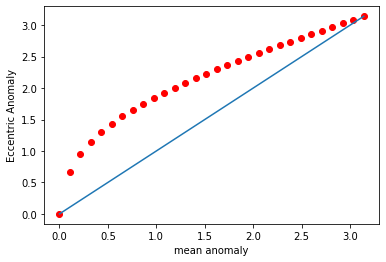

,mean anomaly,ecentric anomaly
0,0.000000,0.000000
1,0.108331,0.660470
2,0.216662,0.947341
3,0.324992,1.144413
4,0.433323,1.300692
5,0.541654,1.433140
6,0.649985,1.549786
7,0.758315,1.655118
8,0.866646,1.751923
9,0.974977,1.842065


In [146]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

ec=0.9

def f(y, x):
    f = y - ec*np.sin(y) - x
    return f

def df(y):
    df = 1 - ec*np.cos(y)
    return df

# Use Newton-Rhapson Method


x = np.linspace(0, np.pi, 30)
y = np.zeros(30)
y[0]=0

def sol_f(x, u): #여기서 입력받은 u는 이전 지점의 결과값을 starting point로 삼기 위해서
    TOL = 1.e-12
    err = TOL + 1
    loop = 0 
    k = u
    while (err >= TOL):  
        loop += 1
        if (loop > 1000): break
        err=abs(f(k,x)/df(k))
        k = k - f(k,x)/df(k)
        # print("loop={:2d}  f={:.5e}  df={:.5e}   err={:.5e}".format(loop,f(k),df(k),err))
    return k


for i in range(1, 30):
    y[i] = sol_f(x[i], y[i-1])
    
    

x1 = x.tolist()
y1 = y.tolist()

plt.xlabel("mean anomaly")
plt.ylabel("Eccentric Anomaly")
plt.plot(x1,y1, 'ro')
plt.plot(x,x,'-')
plt.show()


table1 = pd.DataFrame(x1, columns=['mean anomaly'])
table1['ecentric anomaly'] = y1
table1